<a href="https://colab.research.google.com/github/Krisha-priya/data-science_tutorial/blob/main/tutorial_3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Step 1: Create the data
# Example data: 2 classes with 2 features
X = np.array([[1, 2], [2, 3], [3, 3],  # Class 0
              [5, 6], [6, 7], [7, 8]])  # Class 1
y = np.array([0, 0, 0, 1, 1, 1])  # Class labels

In [6]:
# Step 2: Calculate the means
mean_overall = np.mean(X, axis=0)
mean_class_0 = np.mean(X[y == 0], axis=0)
mean_class_1 = np.mean(X[y == 1], axis=0)

In [7]:
# Step 3: Compute the Within-Class Scatter Matrix
S_W = np.zeros((2, 2))
for i in range(len(X)):
    if y[i] == 0:
        diff = (X[i] - mean_class_0).reshape(2, 1)
        S_W += diff.dot(diff.T)
    else:
        diff = (X[i] - mean_class_1).reshape(2, 1)
        S_W += diff.dot(diff.T)

In [8]:
# Step 4: Compute the Between-Class Scatter Matrix
S_B = np.zeros((2, 2))
n_class_0 = np.sum(y == 0)
n_class_1 = np.sum(y == 1)

mean_diff_0 = (mean_class_0 - mean_overall).reshape(2, 1)
S_B += n_class_0 * mean_diff_0.dot(mean_diff_0.T)

mean_diff_1 = (mean_class_1 - mean_overall).reshape(2, 1)
S_B += n_class_1 * mean_diff_1.dot(mean_diff_1.T)

In [9]:
# Step 5: Compute the Eigenvalues and Eigenvectors
# Use np.linalg.pinv to avoid issues with singular matrices
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))

In [10]:
# Step 6: Sort the Eigenvalues and Eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [11]:
# Step 7: Project the data onto the new space
X_lda = X.dot(eigenvectors[:, :1])  # Take the first eigenvector

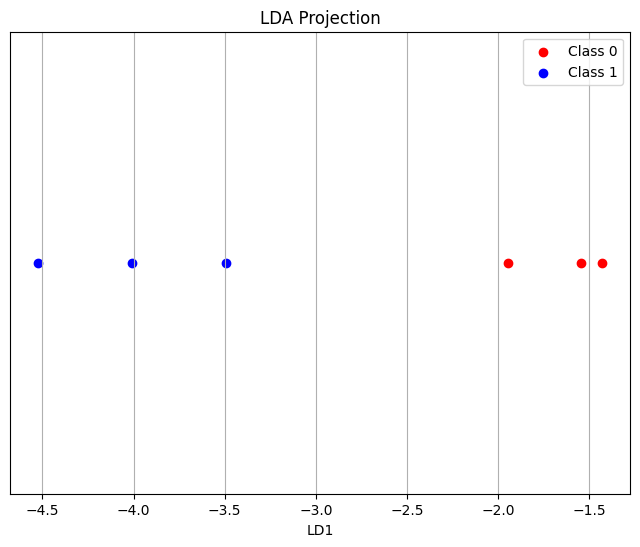

In [12]:
#results..
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[y == 0], np.zeros((n_class_0,)), color='red', label='Class 0')
plt.scatter(X_lda[y == 1], np.zeros((n_class_1,)), color='blue', label='Class 1')
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()